In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# Constants
agent_name = "swq13"
model_name = "more-targets"

In [3]:
trained_model = np.load(f"model_{agent_name}_{model_name}.pt", allow_pickle = True)
policy        = np.argmax(trained_model, axis = 1)

### Evaluating the Trained model

In [8]:
print("State  Policy  Trained model")
for i in range(len(policy)):
    line = f"{i:2}{'':5}{policy[i]}{'':7}["
    for Q_value in trained_model[i]:
        line += f"{Q_value:-7.3f}"
    line += "]"
    print(line)

State  Policy  Trained model
 0     0       [  0.000  0.000  0.000  0.000]
 1     0       [  0.000  0.000  0.000  0.000]
 2     2       [  0.000  0.000  0.023  0.000]
 3     0       [  0.000  0.000  0.000  0.000]
 4     0       [  0.000  0.000  0.000  0.000]
 5     0       [  0.000  0.000  0.000  0.000]
 6     3       [ -0.375 -0.442  0.076  0.768]
 7     2       [ -0.118  0.087  0.306  0.165]
 8     2       [  0.081  0.095  0.286  0.205]
 9     2       [ -0.479 -0.448  0.723  0.090]
10     2       [  0.092  0.167  0.445  0.280]
11     1       [  0.050  0.409  0.122  0.162]
12     3       [  0.032  0.063  0.026  0.070]
13     3       [  0.135  0.092  0.304  0.314]
14     3       [  0.067  0.069  0.000  0.074]


### Looking at the training process

In [5]:
def moving_average(x, w):
    """
    from https://newbedev.com/how-to-calculate-rolling-moving-average-using-numpy-scipy
    """
    return np.convolve(x, np.ones(w), 'valid') / w

In [6]:
with open("results_train.json") as file:
    training_results = json.load(file)

In [7]:
number_of_rounds = training_results['by_agent'][f"agent_{agent_name}"]['rounds']
rounds           = np.arange(number_of_rounds) + 1

round_list      = list(training_results['by_round'])
collected_coins = np.zeros(number_of_rounds)
round_lengths   = np.zeros(number_of_rounds)
for i, round_name in enumerate(round_list):
    round              = training_results['by_round'][round_name]
    collected_coins[i] = round['coins']
    round_lengths[i]   = round['steps']

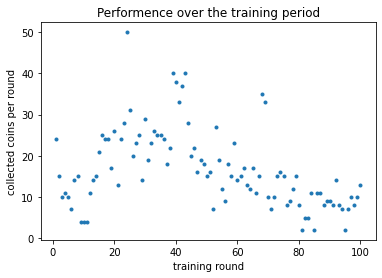

In [8]:
plt.plot(rounds, collected_coins, '.')
plt.title("Performence over the training period")
plt.ylabel("collected coins per round")
plt.xlabel("training round")
plt.show()

In [9]:
allQs = np.load("Qtrain.npy")

In [11]:
def analyze_state (state):
    Q_state = allQs[:, state]
    labels  = ["action 0", "action 1", "action 2", "action 3"]

    plt.plot(rounds, Q_state, label = labels)
    plt.title(f"Evolution of state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()

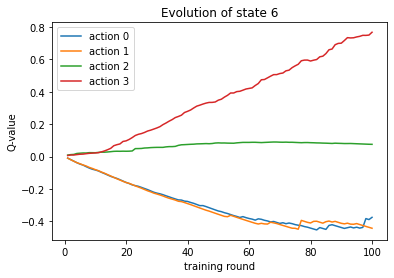

In [12]:
analyze_state(6)

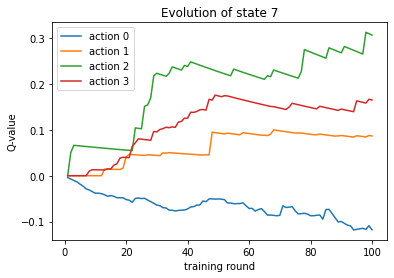

In [13]:
analyze_state(7)

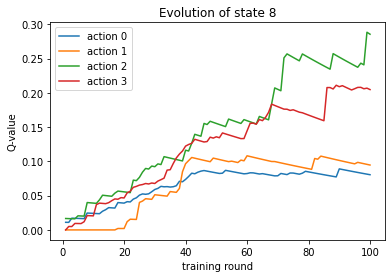

In [14]:
analyze_state(8)